<a href="https://colab.research.google.com/github/Adj95/python_dsc/blob/main/Handling_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HANDLING DATA - MIXED VARIABLES**

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/train (1).csv" , usecols =['Survived' , 'Cabin' , 'Ticket'])
df.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


In [ ]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['cabin_cat'] = df['Cabin'].str[0]
df.head(10)

,Survived,Ticket,Cabin,cabin_num,cabin_cat
0,0,A/5 21171,NaN,NaN,NaN
1,1,PC 17599,C85,85,C
2,1,STON/O2. 3101282,NaN,NaN,NaN
3,1,113803,C123,123,C
4,0,373450,NaN,NaN,NaN
5,0,330877,NaN,NaN,NaN
6,0,17463,E46,46,E
7,0,349909,NaN,NaN,NaN
8,1,347742,NaN,NaN,NaN
9,1,237736,NaN,NaN,NaN


# **HANDING MISSING  DATA - Simple Imputer**

In [2]:
import pandas as  pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
df1 =pd.read_csv("/content/titanic_toy.csv")
df1.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df1.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
x= df1.drop(columns=['Survived'])
y= df1['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [ ]:
#using pandas and numpy
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()
mean_fare = x_train['Fare'].mean()
medain_fare = x_train['Fare'].median()

In [ ]:
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['age_median'] = x_train['Age'].fillna(median_age)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['fare_median'] = x_train['Fare'].fillna(medain_fare)
x_train.sample(5)

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
176,NaN,25.4667,4,29.785904,28.75,25.466700,25.4667
259,50.0,NaN,1,50.000000,50.00,32.617597,14.4583
93,26.0,20.5750,3,26.000000,26.00,20.575000,20.5750
346,40.0,13.0000,0,40.000000,40.00,13.000000,13.0000
118,24.0,247.5208,1,24.000000,24.00,247.520800,247.5208


In [ ]:
print(x_train['Age'].var())
print(x_train['age_mean'].var())
print(x_train['age_median'].var())

204.3495133904614
161.81262452718673
161.9895663346054


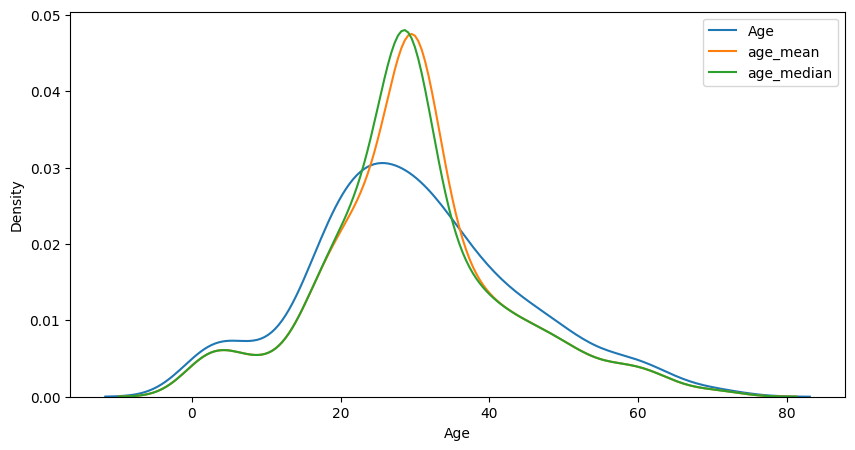

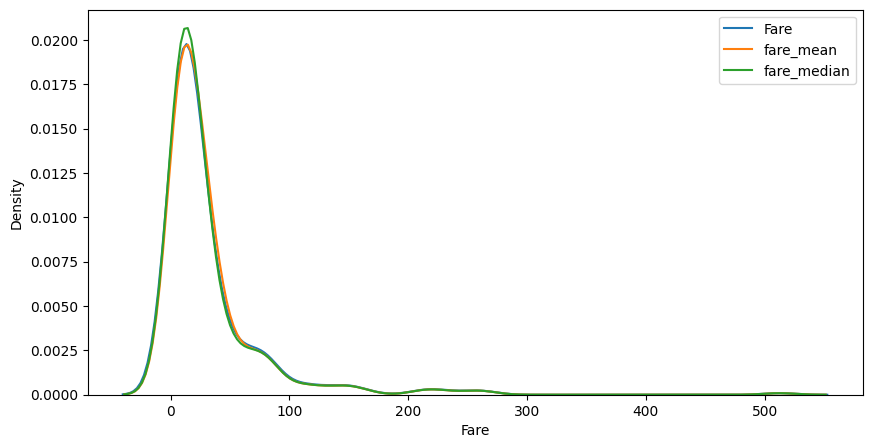

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
sns.kdeplot(x_train['Age'] )
sns.kdeplot(x_train['age_mean'] )
sns.kdeplot(x_train['age_median'])
plt.legend(['Age','age_mean','age_median'])
plt.show()

fig , ax = plt.subplots(figsize=(10,5))
sns.kdeplot(x_train['Fare'] )
sns.kdeplot(x_train['fare_mean'] )
sns.kdeplot(x_train['fare_median'])
plt.legend(['Fare','fare_mean','fare_median'])
plt.show()

<Axes: >

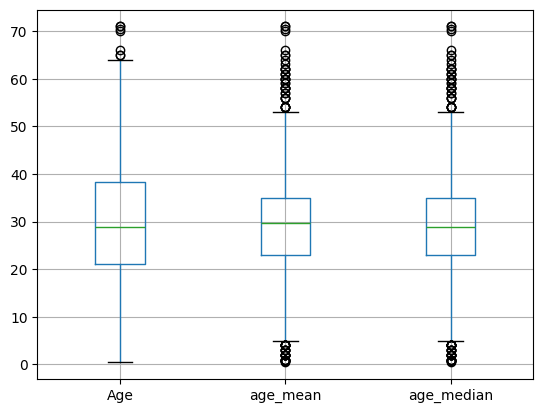

In [ ]:
x_train[['Age' , 'age_mean','age_median']].boxplot()


<Axes: >

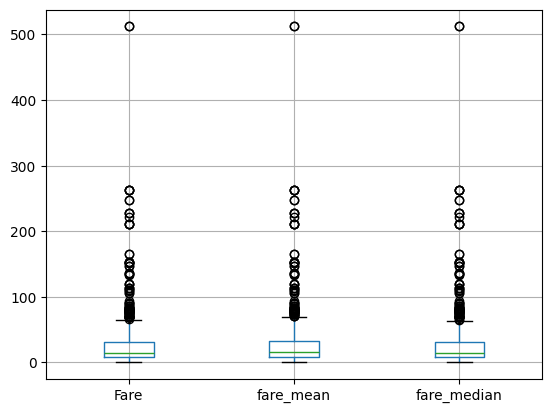

In [ ]:
x_train[['Fare' , 'fare_mean','fare_median']].boxplot()

In [ ]:
#using scikit learn

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

trf = ColumnTransformer([
    ('imputer1' , imputer1, ['Age']),
    ('imputer2' , imputer2, ['Fare'])
],remainder='passthrough'
)

In [ ]:
trf.fit(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train_trf= pd.DataFrame(x_train,columns=x.columns)
x_test_trf= pd.DataFrame(x_test,columns=x.columns)
x_train_trf.head()


,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0


# **HANDLING MISSING DATA - randomn imputation**

In [ ]:
data= pd.read_csv("/content/train (1).csv" , usecols = ['Age' , 'Fare' , 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x= data.drop(columns=['Survived'])
y= data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape,x_test.shape

((712, 2), (179, 2))

In [ ]:
x_train['age_im'] = x_train['Age']
x_test['age_im'] = x_test['Age']
x_test

,Age,Fare,age_im
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [ ]:
x_train['age_im'][x_train['age_im'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['age_im'][x_test['age_im'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-14-2410891469.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_im'][x_train['age_im'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipython-input-14-2410891469.py:2: 

In [ ]:
x_test.sample(10)

,Age,Fare,age_im
109,NaN,24.1500,19.0
447,34.0,26.5500,34.0
688,18.0,7.7958,18.0
376,22.0,7.2500,22.0
627,21.0,77.9583,21.0
726,30.0,21.0000,30.0
164,1.0,39.6875,1.0
522,NaN,7.2250,30.0
785,25.0,7.2500,25.0
557,NaN,227.5250,32.0


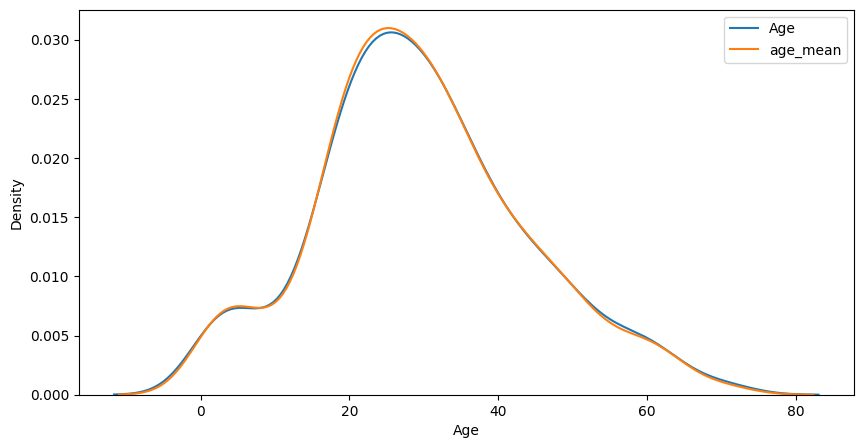

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
sns.kdeplot(x_train['Age'] )
sns.kdeplot(x_train['age_im'] )

plt.legend(['Age','age_mean'])
plt.show()

<Axes: >

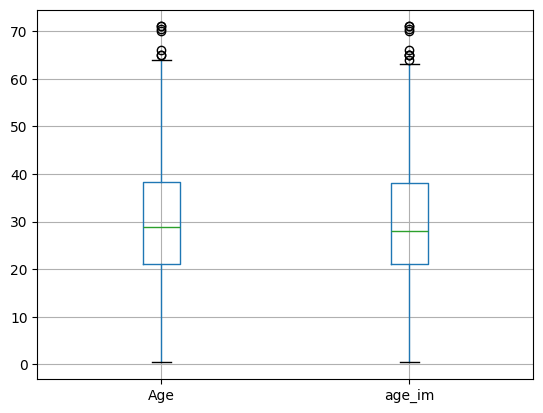

In [ ]:
x_train[['Age' , 'age_im']].boxplot()

# **HANDLING MISSING DATA - Missing Indicator **

In [7]:
df2 = pd.read_csv("/content/train (1).csv" , usecols = [ 'Age' , 'Fare' , 'Survived'])

In [8]:
x= df2.drop(columns=['Survived'])
y= df2['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [18]:
from sklearn.impute import MissingIndicator , SimpleImputer

mi = MissingIndicator()
mi.fit(x_train)

MissingIndicator()

In [14]:
miss_x_train = mi.transform(x_train)
miss_x_test = mi.transform(x_test)


In [16]:
x_train['Age_missing'] = miss_x_train
x_test['Age_missing'] = miss_x_test
x_train.head(10)

,Age,Fare,Age_missing
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
213,30.0,13.0000,False
157,30.0,8.0500,False
780,13.0,7.2292,False
572,36.0,26.3875,False
77,NaN,8.0500,True


In [20]:
si = SimpleImputer()

si.fit(x_train)

SimpleImputer()

In [26]:
x_train = si.transform(x_train)
x_test = si.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173